In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix


In [180]:
df=pd.read_csv(r"C:\Users\jeeva\Documents\Data-scientist\day 6\insurance_data.csv")
print(df.head())
print("info:\n")
print(df.info())

   age  bought_insurance
0   22                 0
1   25                 0
2   47                 1
3   52                 0
4   46                 1
info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes
None


In [181]:
print("null values check:\n",df.isnull().sum())
print("\ndescription:",df.describe())

null values check:
 age                 0
bought_insurance    0
dtype: int64

description:              age  bought_insurance
count  27.000000         27.000000
mean   39.666667          0.518519
std    15.745573          0.509175
min    18.000000          0.000000
25%    25.000000          0.000000
50%    45.000000          1.000000
75%    54.500000          1.000000
max    62.000000          1.000000


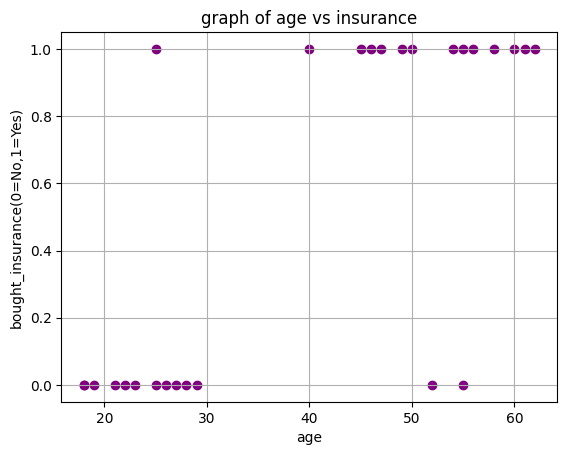

In [182]:
plt.scatter(df['age'],df['bought_insurance'],color='purple')
plt.xlabel('age')
plt.ylabel('bought_insurance(0=No,1=Yes)')
plt.title("graph of age vs insurance")
plt.grid(True)
plt.show()

In [191]:
X=df[['age']]
y=df['bought_insurance']
X_train,X_test,y_train,y_test=train_test_split(
X,y, test_size=0.2,random_state=42
)

In [192]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21, 1)
(6, 1)
(21,)
(6,)


In [193]:
model=LogisticRegression()
model.fit(X_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [ ]:
print(model.coef_)#m
print(model.intercept_)#slope

[[0.11307708]]
[-4.15311919]


In [195]:
y_pred = model.predict(X_test)

print("Predicted: ", y_pred.tolist())
print("Actual:    ", y_test.tolist())

Predicted:  [1, 0, 1, 0, 0, 0]
Actual:     [1, 0, 1, 0, 0, 0]


In [196]:
accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:\n",cm)


accuracy: 1.0
confusion matrix:
 [[4 0]
 [0 2]]


c:\Users\jeeva\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


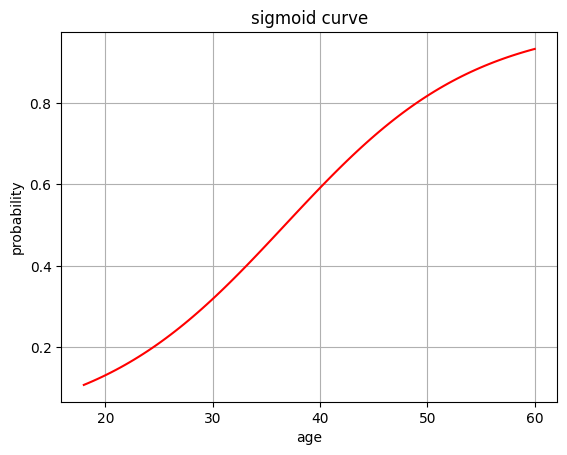

In [197]:
age=np.linspace(18,60,100).reshape(-1,1)#to change 1 d array to 2d array
probs=model.predict_proba(age)[:,1]
plt.plot(age,probs,color='red')
plt.xlabel('age')
plt.ylabel('probability')
plt.title('sigmoid curve')
plt.grid(True)
plt.show()

In [198]:
print("40 yrs-buy insurance?")
print("prediction:",model.predict([[40]]))
print("probability:",model.predict_proba([[40]])[0][1])

40 yrs-buy insurance?
prediction: [1]
probability: 0.5914502932840706


c:\Users\jeeva\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\jeeva\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [200]:
a=model.predict_proba([[40]])
print(a.shape)
print(a)

(1, 2)
[[0.40854971 0.59145029]]


c:\Users\jeeva\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


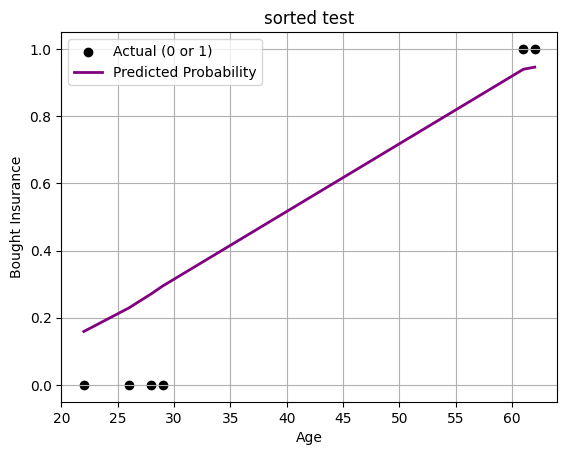

In [209]:
X_test_sorted=X_test.sort_values(by='age')
y_test_sorted=y_test.loc[X_test_sorted.index]
y_pred_sorted=model.predict_proba(X_test_sorted)[:,1]
plt.Figure(figsize=(10, 6))
plt.scatter(X_test_sorted['age'], y_test_sorted, color='black', label = 'Actual (0 or 1)')
plt.plot(X_test_sorted, y_pred_sorted, color ='purple', linewidth = 2, label = 'Predicted Probability')
plt.xlabel('Age')
plt.ylabel('Bought Insurance')
plt.title("sorted test")
plt.legend()
plt.grid(True)
plt.show()